In [1]:
# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2

# MAT281

## Aplicaciones de la Matemática en la Ingeniería

Puedes ejecutar este jupyter notebook de manera interactiva:

[![Binder](../shared/images/jupyter_binder.png)](https://mybinder.org/v2/gh/sebastiandres/mat281_m01_introduccion/master?filepath=00_template/00_template.ipynb)

[![Colab](../shared/images/jupyter_colab.png)](https://colab.research.google.com/github/sebastiandres/mat281_m01_introduccion/blob/master//00_template/00_template.ipynb)

## Intrucciones

- Completa tus datos personales (nombre y rol USM).
- Debes enviar este .ipynb con el siguiente formato de nombre: 0X_filename_NOMBRE_APELLIDO.ipynb con tus respuestas a alonso.ogueda@gmail.com y sebastian.flores@usm.cl .
- Se evaluará:
    * Soluciones
    * Código
    * Al presionar  Kernel -> Restart Kernel and Run All Cells deben ejecutarse todas las celdas sin error.
- La escala es de 0 a 4 considerando solo valores enteros.
- __La entrega es al final de esta clase.__


__Nombre:__

__Rol:__

## ¿Qué contenido aprenderemos?
* El significado de **Visualización Declarativa**
* Una introducción a `Altair`

## Visualización Declarativa


A modo de resumen, se refiere a construir visualizaciones a partir de los siguientes elementos:

* _Data_
* _Transformation_
* _Marks_
* _Encoding_
* _Scale_
* _Guides_

Para una visualización declarativa adecuata, los datos deben encontrarse en el formato _*Tidy*_, es decir:

* Cada variable corresponde a una columna.
* Cada observación corresponde a una fila.
* Cada tipo de unidad de observación corresponde a una tabla.

Un ejemplo de datos _Tidy_:

In [2]:
import pandas as pd
df = pd.DataFrame({
                   "ID": range(5),
                   "Color": ["Azul", "Rojo", "Azul", "Azul", "Rojo"],
                   "Duración": [1, 1, 3, 3, 3]
                  })
df.head()

,ID,Color,Duración
0,0,Azul,1
1,1,Rojo,1
2,2,Azul,3
3,3,Azul,3
4,4,Rojo,3


Un ejemplo de datos __NO__ _Tidy_

In [3]:
df.pivot(index="ID", columns="Color", values="Duración")

Color,Azul,Rojo
ID,,
0,1.0,NaN
1,NaN,1.0
2,3.0,NaN
3,3.0,NaN
4,NaN,3.0


No es _Tidy_ puesto que la variable "Color" utiliza más de una columna.

![key](http://i.imgur.com/G0dFaFF.png)

![hyp](http://i.imgur.com/JdPmESe.png)

### Diferencias entre enfoques

| Imperativa  | Declarativa | 
| ------|------------ | 
| Especificar _cómo_ se debe hacer algo | Especificar _qué_ se quiere hacer |
| Especificación y ejecución entrelazadas | Separar especificación de ejecución |
| _Colocar un círculo rojo aquí y un círculo azul acá_ | _Mapear `x` como posición e `y` como el color_ |

La visualización declarativa te deja pensar sobre los datos y sus relaciones, más que en detalles sin importancia.

### Ejemplo

El _Iris dataset_ es un conjunto de datos famoso por ser un buen ejemplo, por lo que nos servirá para mostrar una de las mayores diferencias entre una visualización imperativa (como `matplotlib`) versus una declarativa (como `altair`).

In [4]:
import altair as alt
from vega_datasets import data  # Una librería con muchos datasets

In [5]:
# Una breve descripción
data.iris?

Signature:       data.iris(use_local=True, **kwargs)
Type:            Dataset
String form:     <vega_datasets.core.Dataset object at 0x7fb22c915a90>
File:            ~/miniconda3/envs/ds-py3/lib/python3.6/site-packages/vega_datasets/core.py
Docstring:      
Loader for the iris dataset.

This classic dataset contains lengths and widths of petals and sepals
for 150 iris flowers, drawn from three species. It was introduced
by R.A. Fisher in 1936 [1]_.

This dataset is bundled with vega_datasets; it can be loaded without web access.
Dataset source: https://vega.github.io/vega-datasets/data/iris.json

Usage
-----

    >>> from vega_datasets import data
    >>> iris = data.iris()
    >>> type(iris)
    <class 'pandas.core.frame.DataFrame'>

Equivalently, you can use

    >>> iris = data('iris')

To get the raw dataset rather than the dataframe, use

    >>> data_bytes = data.iris.raw()
    >>> type(data_bytes)
    bytes

To find the dataset url, use

    >>> data.iris.url
    'https://vega.g

In [6]:
iris = data.iris()
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


El ejemplo clásico consiste en graficar _sepalWidth_ versus _petalLength_ y colorear por especie. 

### Imperativo

En `matplotlib` sería algo así:

In [7]:
import matplotlib.pyplot as plt

Text(0,0.5,'sepalWidth')

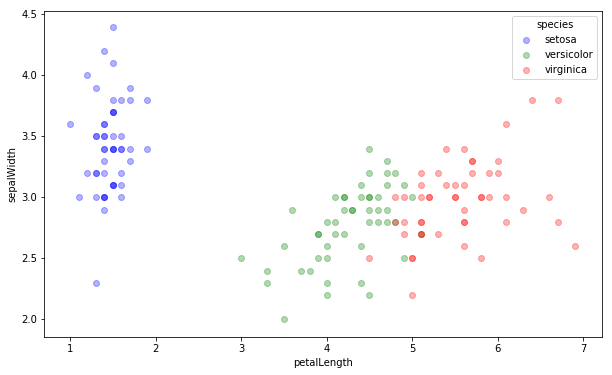

In [8]:
color_map = dict(zip(iris["species"].unique(), 
                     ["blue", "green", "red"]))

plt.figure(figsize=(10,6))

for species, group in iris.groupby("species"):
    plt.scatter(group["petalLength"], 
                group["sepalWidth"],
                color=color_map[species],
                alpha=0.3,
                edgecolor=None,
                label=species,
               )
    
plt.legend(frameon=True, title="species")
plt.xlabel("petalLength")
plt.ylabel("sepalWidth")

### Declarativo

En `altair` sería algo así:

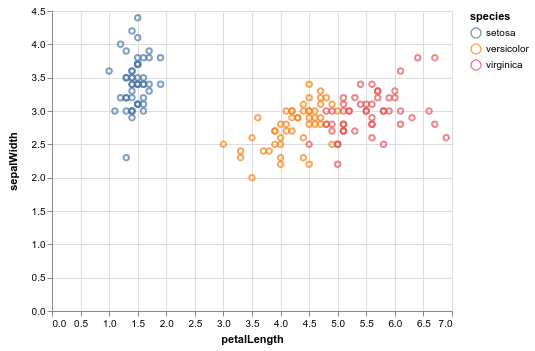

In [9]:
alt.Chart(iris, background="white").mark_point().encode(
    x="petalLength",
    y="sepalWidth",
    color="species"
)

Spoiler: Solo bastan un par de líneas extras para crear un gráfico interactivo!

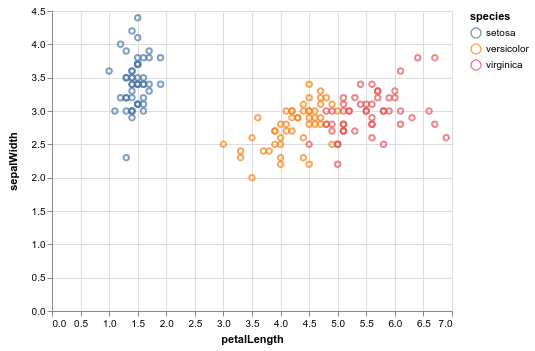

In [10]:
alt.Chart(iris, background="white").mark_point().encode(
    x="petalLength",
    y="sepalWidth",
    color="species",
    tooltip="species"
).interactive()

## Altair

Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite, and the source is available on GitHub.

With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly and consistent and built on top of the powerful Vega-Lite visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code.

### Data
Los datos en Altair son basados en Dataframe de Pandas, los cuales deben ser _Tidy_ para una mejor experiencia.

El objeto _*Chart*_ es el fundamental, pues tiene como argumento los datos.

In [11]:
# Utilizaremos estos datos como ejemplo
import pandas as pd
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})

In [12]:
import altair as alt
chart = alt.Chart(data)

### Mark

¿Cómo queremos que se vean los datos? La respuesta está en los _marks_, que en Altair corresponden a un método de un objeto _Chart_. 

In [13]:
alt.Chart(data).mark_point()

La representación anterior consiste en un solo punto, pues aún no se ha especificado las posiciones de los puntos.

### Encoding

Canales asociados a columnas de los datos con tal de separar visualmente los elementos (que para estos datos se están graficando puntos). 

Por ejemplo, es posible codificar la variable `a` con el canal `x`, que representa el eje horizontal donde se posicionan los puntos. Esto es posible mediante el método `encode` de los objetos _Charts_.

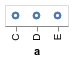

In [14]:
alt.Chart(data).mark_point().encode(
    x='a',
)

Los principales canales de _encoding_ son `x`, `y`, `color`, `shape`, `size`, etc. los cuales se pueden designar utilizando el nombre de la columna asociada a los datos.

Finalmente, separemos la posición vertical asignando el canal `y`, que como te imaginas, corresponde al eje vertical.

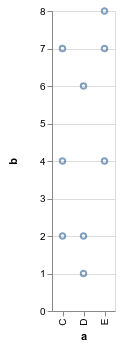

In [15]:
alt.Chart(data).mark_point().encode(
    x='a',
    y='b'
)

### Transformación

Altair permite incluso transformar datos con tal de entregar mayor flexibilidad, para ello dispone de una sintaxis incorporada para `Agregaciones`. Por ejemplo, para calcular el promedio.

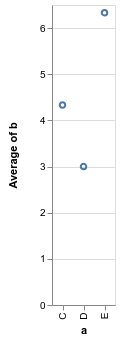

In [16]:
alt.Chart(data).mark_point().encode(
    x='a',
    y='average(b)'
)

Aunque en realidad es más acertado utilizar gráficos de barra para mostrar agregaciones. Es tan fácil como cambiar el método `mark_point()` por `mark_bar()`.

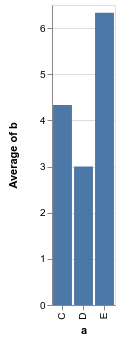

In [17]:
alt.Chart(data).mark_bar().encode(
    x='a',
    y='average(b)'
)

### Muchas más personalizaciones

Por defecto, Altair a través de Vega-Lite realiza algunas elecciones sobre las propiedades por defecto en cada visualización. Sin embargo, Altair también provee una API para personalizar los gráficos. Por ejemplo, es posible especificar el título de cada eje utilizando los atributos de los canales. Inclusive es posible escoger el color de los _marks_.

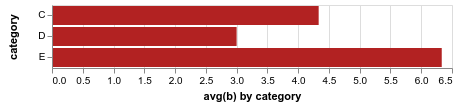

In [18]:
alt.Chart(data).mark_bar(color='firebrick').encode(
    y=alt.Y('a', axis=alt.Axis(title='category')),
    x=alt.X('average(b)', axis=alt.Axis(title='avg(b) by category'))
)

En el ejemplo anterior no basta con solo el nombre de la columna, es necesario crear el objeto `alt.__` correspondiente a los canales.

Otro ejemplo útil consiste en juntar dos gŕaficos en una misma figura.

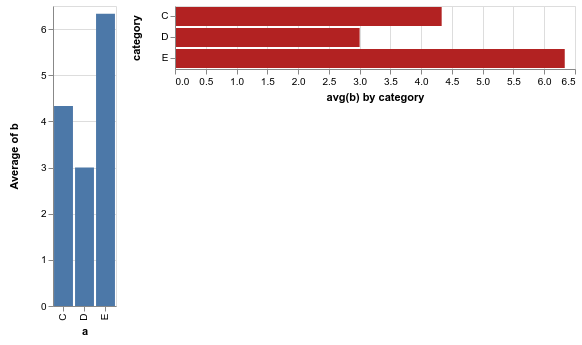

In [19]:
vertical_chart = alt.Chart(data).mark_bar().encode(
    x='a',
    y='average(b)'
)

horizontal_chart = alt.Chart(data).mark_bar(color='firebrick').encode(
    y=alt.Y('a', axis=alt.Axis(title='category')),
    x=alt.X('average(b)', axis=alt.Axis(title='avg(b) by category'))
)

vertical_chart | horizontal_chart  

Inclusive se puden sumar!

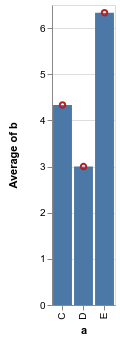

In [20]:
vertical_chart_point = alt.Chart(data).mark_point(color='firebrick').encode(
    x='a',
    y='average(b)'
)

vertical_chart + vertical_chart_point

## Ejercicios

Utilizaremos el conjunto de datos de películas que se encuentra en `vega_datasets` debido a la gran cantidad de variables que posee.

In [23]:
import altair as alt
from vega_datasets import data  # Una librería con muchos datasets

In [21]:
# data.movies?

In [24]:
movies = data.movies()  # Requiere acceso a internet
movies.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,12-Jun-98,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,7-Aug-98,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,28-Aug-98,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,11-Sep-98,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,9-Oct-98,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


_Referencias:_ 

- _Exploratory Data Visualization with Altair. Jake VanderPlas. PyCon 2018._
    * [Video](https://youtu.be/ms29ZPUKxbU)
    * [Slides](https://speakerdeck.com/jakevdp/altair-tutorial-intro-pycon-2018)
- [Documentación _Altair_](https://altair-viz.github.io/)
- [Tidy Data](http://vita.had.co.nz/papers/tidy-data.pdf)